### 특성공학(기초)과 규제

##### 아직도 훈련스코어(세트)보다 테스트스코어가 더 높다
##### 단순 제곱보다 더 고차항을 넣어야 할 거같은데 얼만큼 더 고차항을 넣어야할지 모르겠고, 수동으로 차항을 늘리는게 복잡하다.

In [1]:
# 판다스 임포트
import pandas as pd
# 데이터셋 준비
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full[0])

[8.4  2.11 1.41]


In [2]:
# 독립특성
df.head(3)

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43


In [3]:
# 종속특성
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
# 데이터 스플릿
from sklearn.model_selection import train_test_split 


train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

In [5]:
### 사이킷런의 변환기
# 폴리노미얼피쳐스 임포트  -> 다차항 특성
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# 폴리 예시코드
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [7]:
# train_input 데이터셋에 폴리 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly[0])

[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
   9.2416]


In [8]:
# poly의 계산식
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [9]:
# 테스트셋에 적용
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

In [10]:
train_poly.shape

(42, 9)

In [11]:
### 다중회귀 모델 학습시키기
# 다중회귀는 선형회귀와 모델이 같다(차원, 즉, 특성만 늘어날 뿐이다)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
# 학습스코어 출력
print(lr.score(train_poly, train_target))

0.9903183436982124


In [12]:
# 테스트 스코어 출력
print(lr.score(test_poly, test_target))

0.9714559911594203


In [13]:
## 특성항을 5제곱까지 늘려보자
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [14]:
# 인풋특성 형태확인
print(train_poly.shape)

(42, 55)


In [15]:
# 모델 학습
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.999999999997515


In [16]:
print(lr.score(test_poly, test_target))

-144.40196592191958


In [17]:
### 규제
#### 릿지와 라쏘
## 라쏘 = L1규제를 적용한 모델
## 릿지 = L2규제를 적용한 모델
# 두 방법 다, 회귀식의 기울기를 조절하여 특성 가중값을 조절함
# 릿지는 기울기에 제곱을 기준으로, 라쏘는 기울기에 절대값(루트제곱)을 기준으로 적용됨
# 라쏘는 해당 특성을 아에 0으로 만들어버림

In [18]:
train_poly[0]

array([1.96000000e+01, 5.14000000e+00, 3.04000000e+00, 3.84160000e+02,
       1.00744000e+02, 5.95840000e+01, 2.64196000e+01, 1.56256000e+01,
       9.24160000e+00, 7.52953600e+03, 1.97458240e+03, 1.16784640e+03,
       5.17824160e+02, 3.06261760e+02, 1.81135360e+02, 1.35796744e+02,
       8.03155840e+01, 4.75018240e+01, 2.80944640e+01, 1.47578906e+05,
       3.87018150e+04, 2.28897894e+04, 1.01493535e+04, 6.00273050e+03,
       3.55025306e+03, 2.66161618e+03, 1.57418545e+03, 9.31035750e+02,
       5.50651494e+02, 6.97995264e+02, 4.12822102e+02, 2.44159375e+02,
       1.44405545e+02, 8.54071706e+01, 2.89254655e+06, 7.58555575e+05,
       4.48639873e+05, 1.98927329e+05, 1.17653518e+05, 6.95849599e+04,
       5.21676772e+04, 3.08540347e+04, 1.82483007e+04, 1.07927693e+04,
       1.36807072e+04, 8.09131319e+03, 4.78552376e+03, 2.83034868e+03,
       1.67398054e+03, 3.58769566e+03, 2.12190560e+03, 1.25497919e+03,
       7.42244501e+02, 4.38992857e+02, 2.59637799e+02])

In [19]:
# 특성 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
print(train_scaled[0])

[-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
 -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.88399964 -0.89100599
 -0.87785292 -0.88311456 -0.88430909 -0.8691891  -0.87259422 -0.87147928
 -0.86603533 -0.82233944 -0.82171953 -0.8280588  -0.81928269 -0.82512549
 -0.8278857  -0.81486775 -0.82006923 -0.82177279 -0.82010716 -0.80835934
 -0.81274154 -0.81321125 -0.8098514  -0.80275974 -0.7637909  -0.76597773
 -0.77150714 -0.76668667 -0.77246614 -0.77577893 -0.76571689 -0.77162398
 -0.77472752 -0.77517751 -0.76290623 -0.76877311 -0.77148634 -0.77113383
 -0.767785   -0.75814062 -0.76376113 -0.76586966 -0.76449499 -0.75967179
 -0.75143746]


In [20]:
# 릿지 모델 사용(선형회귀 모델에 L2규제 적용)
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [21]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


In [22]:
# 규제의 강도
# 릿지 모델을 만들 때 규제의 정도를 알파값으로 조절할 수 있음(하이퍼 파라미터)
# 적절한 alpha값을 찾아보자
import matplotlib.pyplot as plt

# 학습점수와 테스트점수를 저장할 리스트 선언
train_score = []
test_score = []

In [23]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 객체 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 빈 리스트에 훈련점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

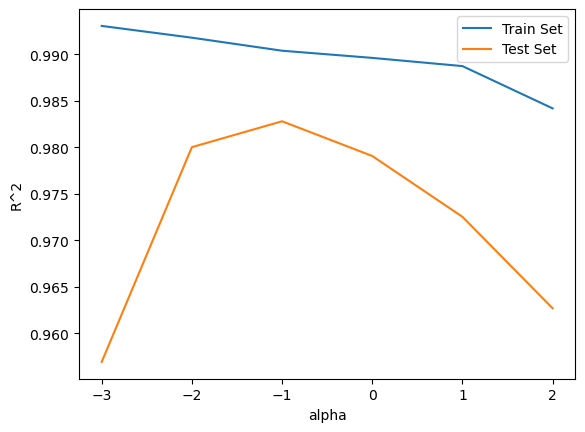

In [24]:
# 트레인점수, 테스트점수 시각화
plt.plot(np.log10(alpha_list), train_score, label='Train Set')
plt.plot(np.log10(alpha_list), test_score, label='Test Set')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [25]:
# 찾은 적절한 규제값으로 모델을 다시 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386894
